## Tema 2. Señales y Sistemas Discretos.

Emplearemos la librería ``numpy`` para cálculo numérico.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Secuencias

Definimos una secuencia:

In [33]:
k = [0,1,2,3,4,5,6,7,8,9]
k

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Una secuencia definida de este modo no es práctica a la hora de realizar operaciones, por ejemplo:

In [34]:
print(k*3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Emplearemos objetos de tipo ``array`` que nos permiten operar con secuencias. Por ejemplo creamos los primeros 10 elementos de la secuencia:

In [35]:
k2 = np.arange(0,10)
k2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
print(k2*3)

[ 0  3  6  9 12 15 18 21 24 27]


De este modo es posible realizar operaciones con la secuencia aplicando funciones, por ejemplo la exponencial:

In [37]:
y = 1 + 0.5**k2 - 0.3**(2*k2)
print(y)

[1.         1.41       1.2419     1.124271   1.06243439 1.0312441
 1.01562447 1.00781245 1.00390625 1.00195312]


Es posible retrasar la secuencia empleando ``pad``:

In [38]:
np.pad(y,(2,0))

array([0.        , 0.        , 1.        , 1.41      , 1.2419    ,
       1.124271  , 1.06243439, 1.0312441 , 1.01562447, 1.00781245,
       1.00390625, 1.00195312])

### Ecuaciones en diferencias

In [39]:
def equation(u):
    # y(k) = y(k-1) + 2*u(k-1)
    y = [0] 
    for i in u:
        y.append( y[-1] + 2*i )
    return( np.array(y) )
    
equation( [1,1,1,1,1] )

array([ 0,  2,  4,  6,  8, 10])

### Muestreo y reconstrucción

In [40]:
def system(u):
    y = []
    yk1 = 0
    yk2 = 0
    for i in np.arange(0,len(u)):
        yk1 = np.pad(y,1)[i]
        yk2 = np.pad(y,2)[i]
        y.append( 1.73*yk1 - 0.84*yk2 + u[i] )
    return( np.array(y) )

y = system( [1]*100 )

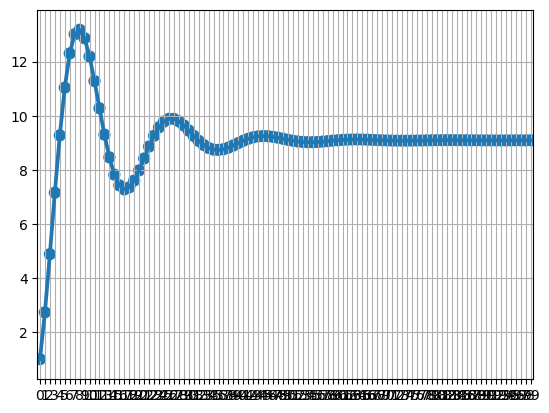

In [41]:
t = np.arange(0,len(y))
ax = sns.pointplot(x=t,y=y)
ax.grid()

## Ejemplos de generación de señales con ecuaciones en diferencias

### 1. Sistema de primer orden: Circuito RC  

Un circuito RC con entrada la tensión $v_i(t)$ y salida la tensión en el condensador $v_c(t)$ cumple con que la tensión de entrada es igual a la suma de la caída de tensión en la resistencia y la tensión en el condensador:

$$
v_i(t) = R i(t) + v_c(t)
$$

$$
v_i(t) = RC \frac{v_(t)}{dt} + v_c(t)
$$

Si aproximamos la derivada de la tensión empleando el método de Newton considerando un paso de integración suficientemente pequeño $T$:

$$
\frac{v_c(t)}{dt} \approx \frac{v_c[n] - v_c[n-1]}{T} 
$$

obtenemos la siguiente ecuación en diferencias que aproxima el comportamiento del circuito RC:

$$
v_i[n] = RC \frac{v_c[n] - v_c[n-1]}{T}  + v_c[n]
$$

$$
(1+\frac{RC}{T})v_c[n] = \frac{RC}{T} v_c[n-1] + v_i[n]
$$

Definimos el parámetro: $\beta = \frac{RC}{T}$:
$$
(1+\beta)v_c[n] = \beta v_c[n-1] + v_i[n]
$$

$$
v_c[n] = \frac{\beta}{1+\beta} v_c[n-1] + \frac{1}{1+\beta} v_i[n]
$$

Si llamo $\alpha = \frac{1}{1+\beta}$, obtengo la ecuación en diferencias general del circuito RC:  

$$
v_c[n] = (1 - \alpha) v_c[n-1] + \alpha v_i[n]
$$

donde $ \alpha = \frac{T}{RC + T} $ es un coeficiente basado en la constante de tiempo del circuito.


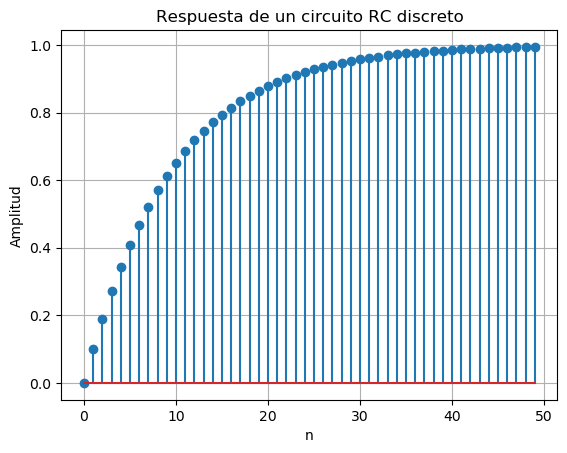

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 0.1  # Coeficiente del sistema
N = 50  # Número de muestras
x = np.ones(N)  # Entrada escalón unitario
y = np.zeros(N)  # Inicialización de la salida

# Ecuación en diferencias
y[0] = 0  # Condición inicial
for n in range(1, N):
    y[n] = (1 - a) * y[n-1] + a * x[n]

# Graficar
plt.stem(range(N), y, use_line_collection=True)
plt.title("Respuesta de un circuito RC discreto")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


### 2. Sistema de primer orden: Enfriamiento de Newton
El modelo de enfriamiento sigue:  

$$
y[n]=(1−k)y[n−1]+k T_{amb}
$$

donde $k$ es una constante térmica y $T_{amb}$ la temperatura ambiente.


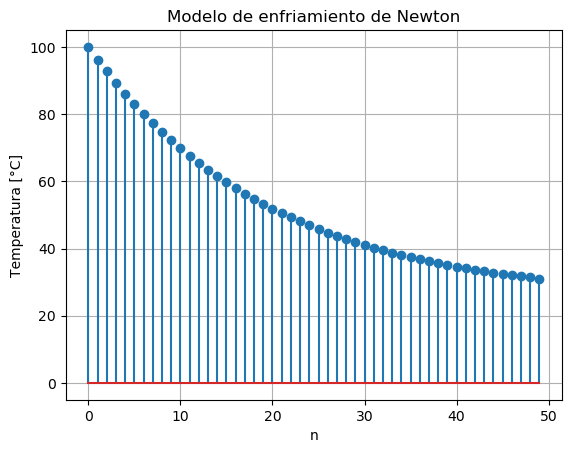

In [43]:
k = 0.05  # Constante térmica
T_amb = 25  # Temperatura ambiente
y = np.zeros(N)
y[0] = 100  # Temperatura inicial

for n in range(1, N):
    y[n] = (1 - k) * y[n-1] + k * T_amb

plt.stem(range(N), y, use_line_collection=True)
plt.title("Modelo de enfriamiento de Newton")
plt.xlabel("n")
plt.ylabel("Temperatura [°C]")
plt.grid()
plt.show()


### 3. Sistema de segundo orden: Oscilador masa-resorte
Un sistema masa-resorte sin amortiguamiento tiene la ecuación en diferencias:

$$ y[n] = 2 \cos (\omega) y[n-1] - y[n-2] $$

donde  $\omega$ es la frecuencia natural del sistema.

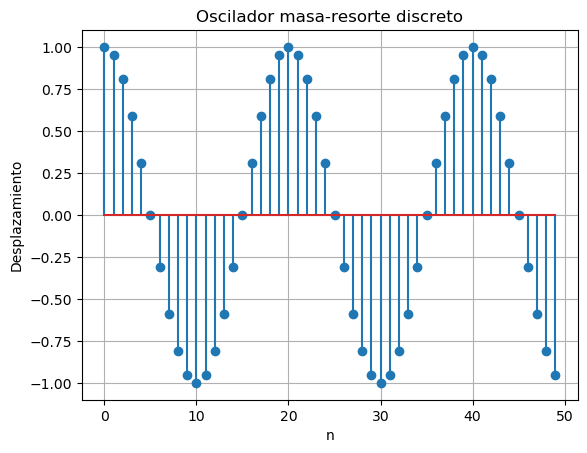

In [44]:
omega = np.pi / 10  # Frecuencia natural
y = np.zeros(N)
y[0], y[1] = 1, np.cos(omega)  # Condiciones iniciales

for n in range(2, N):
    y[n] = 2 * np.cos(omega) * y[n-1] - y[n-2]

plt.stem(range(N), y, use_line_collection=True)
plt.title("Oscilador masa-resorte discreto")
plt.xlabel("n")
plt.ylabel("Desplazamiento")
plt.grid()
plt.show()


4. Sistema de segundo orden: Amortiguamiento en un oscilador
Si consideramos amortiguamiento, la ecuación se modifica a:
$$y[n]=2r \cos(\omega)y[n−1]−r^2 y[n−2] $$
donde $r$ controla la atenuación.

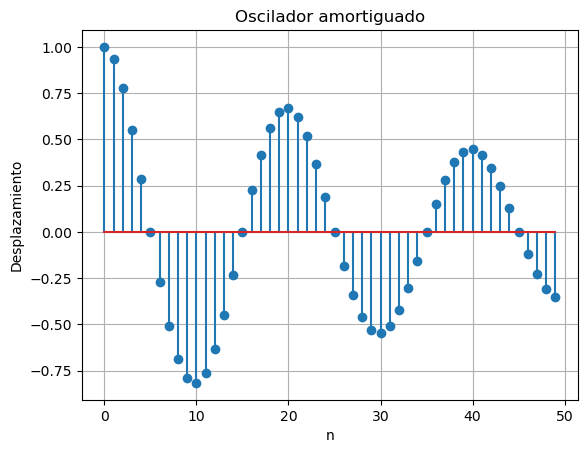

In [45]:
r = 0.98  # Factor de amortiguamiento
y = np.zeros(N)
y[0], y[1] = 1, r * np.cos(omega)

for n in range(2, N):
    y[n] = 2 * r * np.cos(omega) * y[n-1] - (r**2) * y[n-2]

plt.stem(range(N), y, use_line_collection=True)
plt.title("Oscilador amortiguado")
plt.xlabel("n")
plt.ylabel("Desplazamiento")
plt.grid()
plt.show()


### 5. Sistema de segundo orden: Modelo de un circuito RLC
El sistema RLC sigue una ecuación similar al oscilador masa-resorte pero con amortiguamiento.

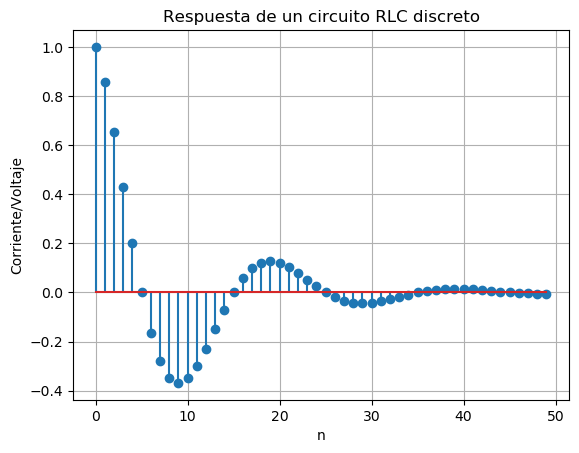

In [46]:
r = 0.9  # Amortiguamiento del circuito
y = np.zeros(N)
y[0], y[1] = 1, r * np.cos(omega)

for n in range(2, N):
    y[n] = 2 * r * np.cos(omega) * y[n-1] - (r**2) * y[n-2]

plt.stem(range(N), y, use_line_collection=True)
plt.title("Respuesta de un circuito RLC discreto")
plt.xlabel("n")
plt.ylabel("Corriente/Voltaje")
plt.grid()
plt.show()
